In [1]:
import numpy as np
import pyccl as ccl
from Fisher_Forecaster import *
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
probe = "lensing"
bin_type = "equal_size"
nbins = 5
deriv_order = 2
derivs_to_calc = "all"
use_binned = True
use_h2 = True

In [3]:
F = Fisher_Forecaster(probe, bin_type, nbins, deriv_order, derivs_to_calc, use_binned=use_binned, use_h2=use_h2)

In [4]:
F.cosmo_params

{'w0': -0.9,
 'wa': 0.0,
 'h0': 0.72,
 'A_s': 2.1e-09,
 'n_s': 0.96,
 'galbias': 1.0,
 'lmin': 76.0,
 'lmax': 999.0,
 'deltal': 1.0,
 'N_eff': 3.046,
 'om_m_h2': 0.1296,
 'om_b_h2': 0.020736}

Calculate tomographic bins and fiducial data

In [6]:
F.get_tomo_data(to_save=False)
F.tracers = F.get_tracers(F.cosmo)
F.c_ells = F.get_c_ells(F.tracers, F.cosmo)
F.binned_ells = F.get_binned_ells(F.ells)
F.binned_c_ells = F.get_binned_c_ells(F.c_ells)
F.get_cov_mat()
F.bin_cov_mats()

Calculating 5 bins of equal_size
sig_ep^2 =  0.23
n_g =  [[1.19105026e+08 1.14729559e+08 4.79063899e+07 1.74947572e+07
  6.22262149e+06]]
num dens =  [[1.03569588e+09 9.97648343e+08 4.16577303e+08 1.52128323e+08
  5.41097521e+07]]
Calculating new covariance matrix
Binning the theoretical covariance matrices
Finished binning the covariance matrices.



Calculate derivatives

In [8]:
F.deltas = [0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.02]

In [9]:
F.derivs = dict()
F.deriv_step_c_ells = dict()
for i in range(len(F.paras)):
    para = F.paras[i]
    delta = F.deltas[i]
    F.derivs[para], F.deriv_step_c_ells[para] = F.calc_para_deriv(para, F.deriv_order, delta)
print("Finished Derivatives")

Changing paramater om_m_h2 from 1.296000e-01 by -1 * 2.592000e-03
Changing paramater om_m_h2 from 1.296000e-01 by 1 * 2.592000e-03

Changing paramater w0 from -9.000000e-01 by -1 * 1.800000e-02
Changing paramater w0 from -9.000000e-01 by 1 * 1.800000e-02

Changing paramater h0 from 7.200000e-01 by -1 * 1.440000e-02
Changing paramater h0 from 7.200000e-01 by 1 * 1.440000e-02

Changing paramater A_s from 2.100000e-09 by -1 * 4.200000e-11
Changing paramater A_s from 2.100000e-09 by 1 * 4.200000e-11

Changing paramater om_b_h2 from 2.073600e-02 by -1 * 4.147200e-04
Changing paramater om_b_h2 from 2.073600e-02 by 1 * 4.147200e-04

Changing paramater n_s from 9.600000e-01 by -1 * 9.600000e-03
Changing paramater n_s from 9.600000e-01 by 1 * 9.600000e-03

Changing paramater wa from 0.000000e+00 by -1 * 1.800000e-02
Changing paramater wa from 0.000000e+00 by 1 * 1.800000e-02

Finished Derivatives


Bin the derivatives in ell

In [10]:
F.bin_derivs()

Get Fisher matrix without tuning derivatives

In [131]:
F.get_fisher_mat()
pd.DataFrame(F.fisher, index=F.paras, columns=F.paras)

,om_m_h2,w0,h0,A_s,om_b_h2,n_s,wa
om_m_h2,5.471808e+07,-2.845770e+06,-7.430638e+06,1.564597e+15,-3.083459e+07,2.667086e+06,-9.185837e+05
w0,-2.845770e+06,1.496613e+05,3.847683e+05,-8.181234e+13,1.614342e+06,-1.350882e+05,4.839899e+04
h0,-7.430638e+06,3.847683e+05,1.022598e+06,-2.111925e+14,4.111239e+06,-3.611732e+05,1.234830e+05
A_s,1.564597e+15,-8.181234e+13,-2.111925e+14,4.496516e+22,-8.887088e+14,7.541974e+13,-2.649225e+13
om_b_h2,-3.083459e+07,1.614342e+06,4.111239e+06,-8.887088e+14,1.781083e+07,-1.505041e+06,5.250296e+05
n_s,2.667086e+06,-1.350882e+05,-3.611732e+05,7.541974e+13,-1.505041e+06,1.421470e+05,-4.356234e+04
wa,-9.185837e+05,4.839899e+04,1.234830e+05,-2.649225e+13,5.250296e+05,-4.356234e+04,1.569780e+04


In [38]:
# derivs = np.zeros((len(F.derivs), *F.derivs["w0"].shape))
# for i, para in enumerate(F.derivs):
#     derivs[i] = F.derivs[para]
# derivs = derivs[:,:,1:]
# inv_cov_mats = np.array([np.linalg.inv(i) for i in F.cov_mats])
# einsum_fisher = np.einsum("ali,lij,blj->ab", derivs, inv_cov_mats, derivs)

Get some Figures of Merit

In [190]:
para_pairs_list = [("om_m_h2", "A_s"), ("w0", "wa")]
F.get_fom(priors=False, para_pairs_list=para_pairs_list)

om_m_h2 A_s 70886543664.73163
w0 wa 26.837774138133444


## Now let's tune some derivatives

In [10]:
delta_start = 1e-3
delta_end = 3e-1
delta_num = 50
deltas = np.logspace(np.log10(delta_start), np.log10(delta_end), delta_num)

#### Parameter $\Omega_m h^2$

In [11]:
tune_para = 'om_m_h2'

In [13]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_h2_A_s = np.zeros(deltas.shape)

In [17]:
derivs = np.zeros((len(deltas), *F.derivs[tune_para].shape))
cl_steps = []

In [93]:
for i in range(len(deltas)):
    print("run %d/50"%(i+1))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, F.deriv_order, deltas[i])
    cl_steps.append(step)
    derivs[i] = F.derivs[tune_para]
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_h2_A_s[i] = F.foms[('om_m_h2', 'A_s')]

run 1/50
Changing paramater om_m_h2 from 1.296000e-01 by -1 * 1.296000e-04
{'w0': -0.9, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.1e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 76.0, 'lmax': 999.0, 'deltal': 1.0, 'N_eff': 3.046, 'om_m_h2': 0.12947039999999999, 'om_b_h2': 0.020736}
Changing paramater om_m_h2 from 1.296000e-01 by 1 * 1.296000e-04
{'w0': -0.9, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.1e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 76.0, 'lmax': 999.0, 'deltal': 1.0, 'N_eff': 3.046, 'om_m_h2': 0.1297296, 'om_b_h2': 0.020736}

om_m_h2 A_s 76477144132.5877
w0 wa 18.448906778980074
run 2/50
Changing paramater om_m_h2 from 1.296000e-01 by -1 * 1.455990e-04
{'w0': -0.9, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.1e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 76.0, 'lmax': 999.0, 'deltal': 1.0, 'N_eff': 3.046, 'om_m_h2': 0.12945440096501493, 'om_b_h2': 0.020736}
Changing paramater om_m_h2 from 1.296000e-01 by 1 * 1.455990e-04
{'w0': -0.9, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.1e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 76.0

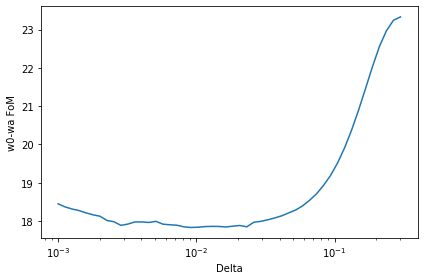

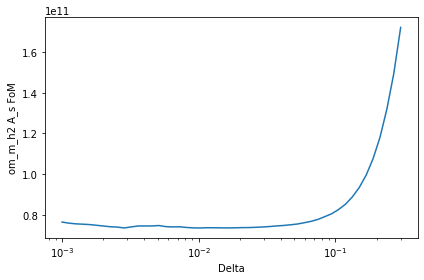

In [99]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_h2_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m_h2 A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.02 for om_m_h2

In [12]:
F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.02)
F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])

Changing paramater om_m_h2 from 1.296000e-01 by -1 * 2.592000e-03
Changing paramater om_m_h2 from 1.296000e-01 by 1 * 2.592000e-03



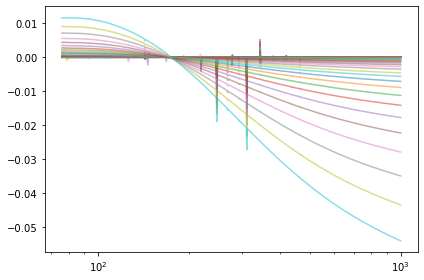

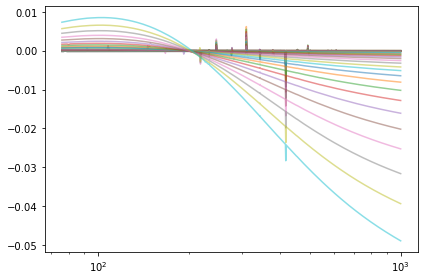

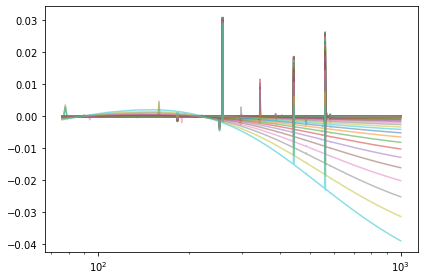

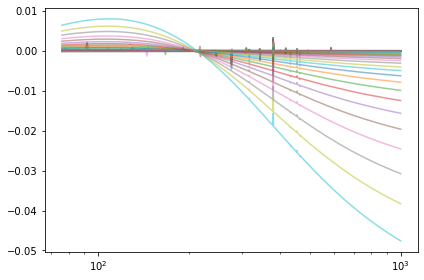

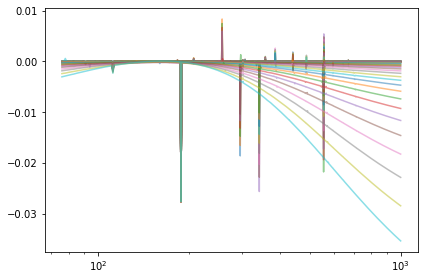

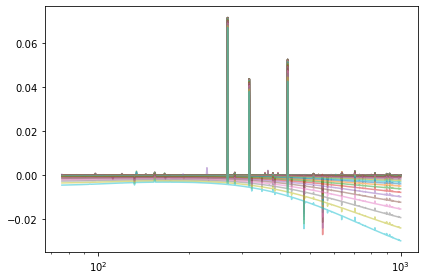

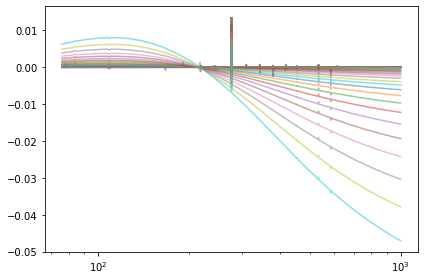

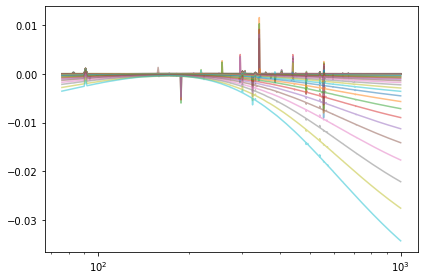

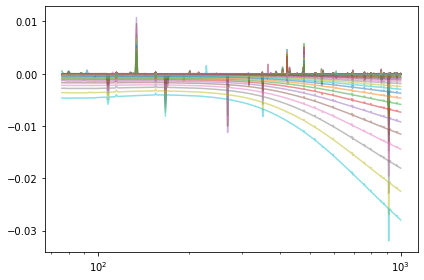

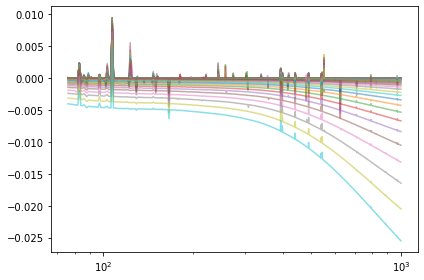

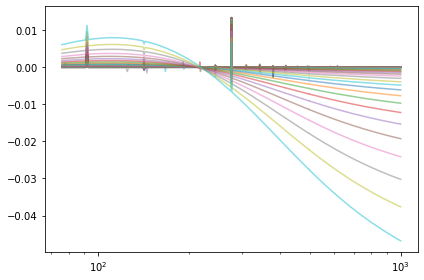

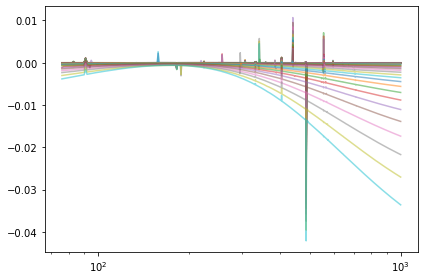

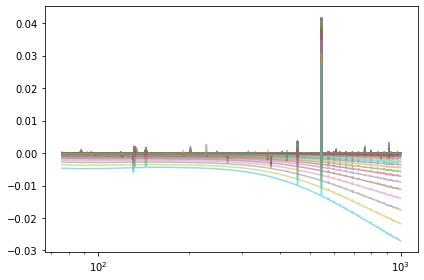

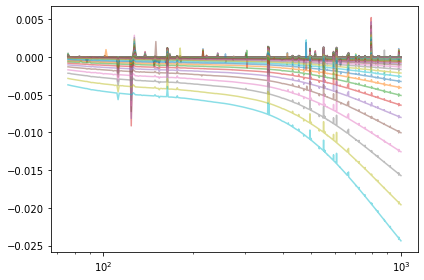

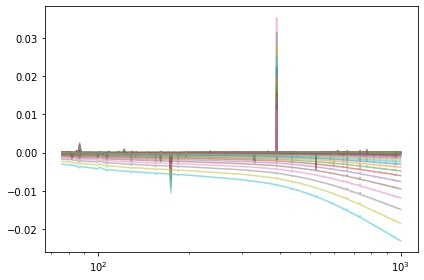

In [80]:
for b in range(1, len(deriv[0])):
    for deriv in derivs:
#         plt.semilogx(deriv[:, 0], (deriv[:, b]- derivs[0][:, b])/derivs[0][:, b])
        plt.semilogx(deriv[:, 0], (deriv[:, b]-derivs[0][:, b])/derivs[0][:, b], alpha=0.5)
        
#     plt.ylim(bottom=-1e-3, top=1e-3)
    plt.tight_layout()
    plt.show()

#### Parameter $w_0$

In [13]:
tune_para = 'w0'

In [110]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_h2_A_s = np.zeros(deltas.shape)

In [111]:
derivs = np.zeros((len(deltas), *F.derivs[tune_para].shape))
cl_steps = []

In [112]:
for i in range(len(deltas)):
    print("run %d/50"%(i+1))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, F.deriv_order, deltas[i])
    cl_steps.append(step)
    derivs[i] = F.derivs[tune_para]
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_h2_A_s[i] = F.foms[('om_m_h2', 'A_s')]

run 1/50
Changing paramater w0 from -9.000000e-01 by -1 * 9.000000e-04
{'w0': -0.9009, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.1e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 76.0, 'lmax': 999.0, 'deltal': 1.0, 'N_eff': 3.046, 'om_m_h2': 0.1296, 'om_b_h2': 0.020736}
Changing paramater w0 from -9.000000e-01 by 1 * 9.000000e-04
{'w0': -0.8991, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.1e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 76.0, 'lmax': 999.0, 'deltal': 1.0, 'N_eff': 3.046, 'om_m_h2': 0.1296, 'om_b_h2': 0.020736}

om_m_h2 A_s 72798700031.03722
w0 wa 18.70939210734601
run 2/50
Changing paramater w0 from -9.000000e-01 by -1 * 1.011104e-03
{'w0': -0.9010111044096185, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.1e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 76.0, 'lmax': 999.0, 'deltal': 1.0, 'N_eff': 3.046, 'om_m_h2': 0.1296, 'om_b_h2': 0.020736}
Changing paramater w0 from -9.000000e-01 by 1 * 1.011104e-03
{'w0': -0.8989888955903815, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.1e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 76.0, 'lmax':

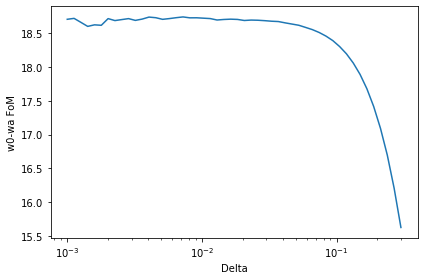

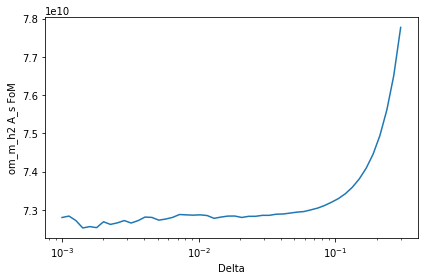

In [113]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_h2_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m_h2 A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.02 for w0

In [14]:
F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.02)
F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])

Changing paramater w0 from -9.000000e-01 by -1 * 1.800000e-02
Changing paramater w0 from -9.000000e-01 by 1 * 1.800000e-02



#### Parameter $h_0$

In [15]:
tune_para = 'h0'

In [116]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_h2_A_s = np.zeros(deltas.shape)

In [117]:
derivs = np.zeros((len(deltas), *F.derivs[tune_para].shape))
cl_steps = []

In [118]:
for i in range(len(deltas)):
    print("run %d/50"%(i+1))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, F.deriv_order, deltas[i])
    cl_steps.append(step)
    derivs[i] = F.derivs[tune_para]
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_h2_A_s[i] = F.foms[('om_m_h2', 'A_s')]

run 1/50
Changing paramater h0 from 7.200000e-01 by -1 * 7.200000e-04
{'w0': -0.9, 'wa': 0.0, 'h0': 0.7192799999999999, 'A_s': 2.1e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 76.0, 'lmax': 999.0, 'deltal': 1.0, 'N_eff': 3.046, 'om_m_h2': 0.1296, 'om_b_h2': 0.020736}
Changing paramater h0 from 7.200000e-01 by 1 * 7.200000e-04
{'w0': -0.9, 'wa': 0.0, 'h0': 0.72072, 'A_s': 2.1e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 76.0, 'lmax': 999.0, 'deltal': 1.0, 'N_eff': 3.046, 'om_m_h2': 0.1296, 'om_b_h2': 0.020736}

om_m_h2 A_s 65823770922.79911
w0 wa 26.415216733414354
run 2/50
Changing paramater h0 from 7.200000e-01 by -1 * 8.088835e-04
{'w0': -0.9, 'wa': 0.0, 'h0': 0.7191911164723052, 'A_s': 2.1e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 76.0, 'lmax': 999.0, 'deltal': 1.0, 'N_eff': 3.046, 'om_m_h2': 0.1296, 'om_b_h2': 0.020736}
Changing paramater h0 from 7.200000e-01 by 1 * 8.088835e-04
{'w0': -0.9, 'wa': 0.0, 'h0': 0.7208088835276948, 'A_s': 2.1e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 76.0, '

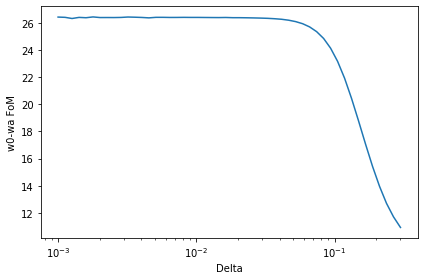

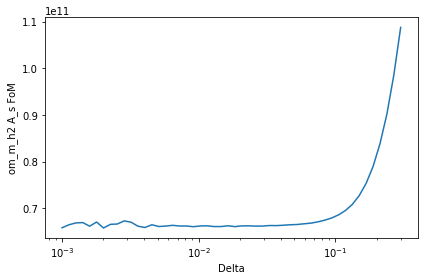

In [119]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_h2_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m_h2 A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.02 for h0

In [16]:
F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.02)
F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])

Changing paramater h0 from 7.200000e-01 by -1 * 1.440000e-02
Changing paramater h0 from 7.200000e-01 by 1 * 1.440000e-02



#### Parameter $A_s$

In [17]:
tune_para = 'A_s'

In [122]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_h2_A_s = np.zeros(deltas.shape)

In [123]:
derivs = np.zeros((len(deltas), *F.derivs[tune_para].shape))
cl_steps = []

In [124]:
for i in range(len(deltas)):
    print("run %d/50"%(i+1))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, F.deriv_order, deltas[i])
    cl_steps.append(step)
    derivs[i] = F.derivs[tune_para]
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_h2_A_s[i] = F.foms[('om_m_h2', 'A_s')]

run 1/50
Changing paramater A_s from 2.100000e-09 by -1 * 2.100000e-12
{'w0': -0.9, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.0979000000000004e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 76.0, 'lmax': 999.0, 'deltal': 1.0, 'N_eff': 3.046, 'om_m_h2': 0.1296, 'om_b_h2': 0.020736}
Changing paramater A_s from 2.100000e-09 by 1 * 2.100000e-12
{'w0': -0.9, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.1021e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 76.0, 'lmax': 999.0, 'deltal': 1.0, 'N_eff': 3.046, 'om_m_h2': 0.1296, 'om_b_h2': 0.020736}

om_m_h2 A_s 67175567888.651695
w0 wa 26.427254889586433
run 2/50
Changing paramater A_s from 2.100000e-09 by -1 * 2.359244e-12
{'w0': -0.9, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.097640756377557e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 76.0, 'lmax': 999.0, 'deltal': 1.0, 'N_eff': 3.046, 'om_m_h2': 0.1296, 'om_b_h2': 0.020736}
Changing paramater A_s from 2.100000e-09 by 1 * 2.359244e-12
{'w0': -0.9, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.102359243622443e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 7

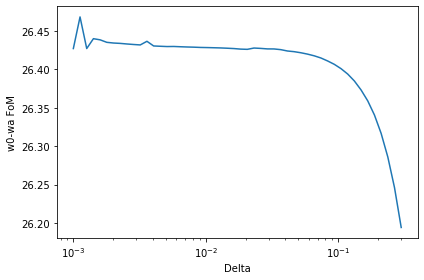

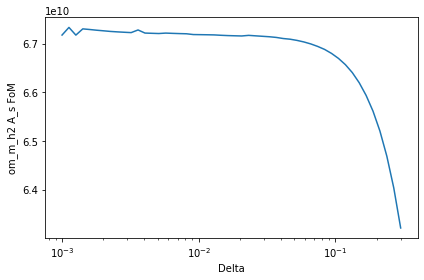

In [125]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_h2_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m_h2 A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.02 for A_s

In [18]:
F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.02)
F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])

Changing paramater A_s from 2.100000e-09 by -1 * 4.200000e-11
Changing paramater A_s from 2.100000e-09 by 1 * 4.200000e-11



#### Parameter $\Omega_b h^2$

In [19]:
tune_para = 'om_b_h2'

In [128]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_h2_A_s = np.zeros(deltas.shape)

In [129]:
derivs = np.zeros((len(deltas), *F.derivs[tune_para].shape))
cl_steps = []

In [130]:
for i in range(len(deltas)):
    print("run %d/50"%(i+1))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, F.deriv_order, deltas[i])
    cl_steps.append(step)
    derivs[i] = F.derivs[tune_para]
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_h2_A_s[i] = F.foms[('om_m_h2', 'A_s')]

run 1/50
Changing paramater om_b_h2 from 2.073600e-02 by -1 * 2.073600e-05
{'w0': -0.9, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.1e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 76.0, 'lmax': 999.0, 'deltal': 1.0, 'N_eff': 3.046, 'om_m_h2': 0.1296, 'om_b_h2': 0.020715264}
Changing paramater om_b_h2 from 2.073600e-02 by 1 * 2.073600e-05
{'w0': -0.9, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.1e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 76.0, 'lmax': 999.0, 'deltal': 1.0, 'N_eff': 3.046, 'om_m_h2': 0.1296, 'om_b_h2': 0.020756736}

om_m_h2 A_s 79169555268.06032
w0 wa 26.50551057330635
run 2/50
Changing paramater om_b_h2 from 2.073600e-02 by -1 * 2.329585e-05
{'w0': -0.9, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.1e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 76.0, 'lmax': 999.0, 'deltal': 1.0, 'N_eff': 3.046, 'om_m_h2': 0.1296, 'om_b_h2': 0.020712704154402392}
Changing paramater om_b_h2 from 2.073600e-02 by 1 * 2.329585e-05
{'w0': -0.9, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.1e-09, 'n_s': 0.96, 'galbias': 1.0, 'lmin': 76.0, 'lmax': 9

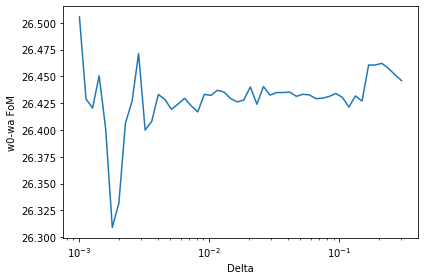

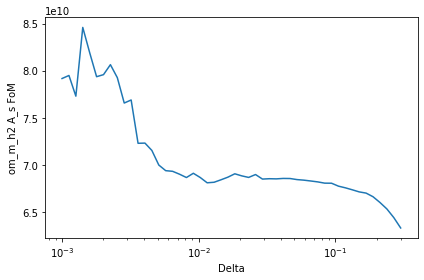

In [131]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_h2_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m_h2 A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.02 for om_b_h2

In [20]:
F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.02)
F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])

Changing paramater om_b_h2 from 2.073600e-02 by -1 * 4.147200e-04
Changing paramater om_b_h2 from 2.073600e-02 by 1 * 4.147200e-04



#### Parameter $n_s$

In [21]:
tune_para = 'n_s'

In [134]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_h2_A_s = np.zeros(deltas.shape)

In [135]:
derivs = np.zeros((len(deltas), *F.derivs[tune_para].shape))
cl_steps = []

In [136]:
for i in range(len(deltas)):
    print("run %d/50"%(i+1))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, F.deriv_order, deltas[i])
    cl_steps.append(step)
    derivs[i] = F.derivs[tune_para]
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_h2_A_s[i] = F.foms[('om_m_h2', 'A_s')]

run 1/50
Changing paramater n_s from 9.600000e-01 by -1 * 9.600000e-04
{'w0': -0.9, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.1e-09, 'n_s': 0.95904, 'galbias': 1.0, 'lmin': 76.0, 'lmax': 999.0, 'deltal': 1.0, 'N_eff': 3.046, 'om_m_h2': 0.1296, 'om_b_h2': 0.020736}
Changing paramater n_s from 9.600000e-01 by 1 * 9.600000e-04
{'w0': -0.9, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.1e-09, 'n_s': 0.9609599999999999, 'galbias': 1.0, 'lmin': 76.0, 'lmax': 999.0, 'deltal': 1.0, 'N_eff': 3.046, 'om_m_h2': 0.1296, 'om_b_h2': 0.020736}

om_m_h2 A_s 70458985736.55287
w0 wa 26.854816665203835
run 2/50
Changing paramater n_s from 9.600000e-01 by -1 * 1.078511e-03
{'w0': -0.9, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.1e-09, 'n_s': 0.9589214886297402, 'galbias': 1.0, 'lmin': 76.0, 'lmax': 999.0, 'deltal': 1.0, 'N_eff': 3.046, 'om_m_h2': 0.1296, 'om_b_h2': 0.020736}
Changing paramater n_s from 9.600000e-01 by 1 * 1.078511e-03
{'w0': -0.9, 'wa': 0.0, 'h0': 0.72, 'A_s': 2.1e-09, 'n_s': 0.9610785113702597, 'galbias': 1.0, 'lmin': 76.

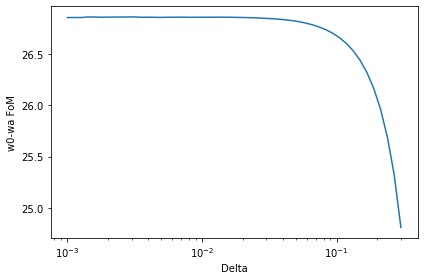

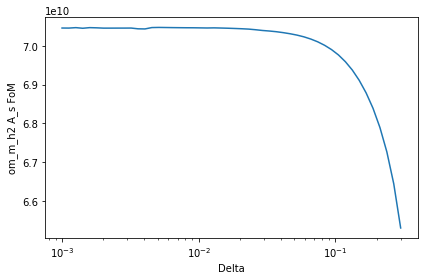

In [137]:
plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_h2_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m_h2 A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.01 for $n_s$

In [22]:
F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.01)
F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])

Changing paramater n_s from 9.600000e-01 by -1 * 9.600000e-03
Changing paramater n_s from 9.600000e-01 by 1 * 9.600000e-03



#### Parameter $w_a$

In [23]:
tune_para = 'wa'

In [24]:
fom_w0_wa = np.zeros(deltas.shape)
fom_om_m_h2_A_s = np.zeros(deltas.shape)

In [25]:
derivs = np.zeros((len(deltas), *F.derivs[tune_para].shape))
cl_steps = []

In [26]:
for i in range(41):
    print("run %d/50"%(i+1))
    F.derivs[tune_para], step = F.calc_para_deriv(tune_para, F.deriv_order, deltas[i])
    cl_steps.append(step)
    derivs[i] = F.derivs[tune_para]
    F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])
    F.get_fisher_mat()
    F.get_fom(priors=False, para_pairs_list=para_pairs_list)
    fom_w0_wa[i] = F.foms[('w0', 'wa')]
    fom_om_m_h2_A_s[i] = F.foms[('om_m_h2', 'A_s')]

run 1/50
Changing paramater wa from 0.000000e+00 by -1 * 9.000000e-04
Changing paramater wa from 0.000000e+00 by 1 * 9.000000e-04

om_m_h2 A_s 69655413587.7104
w0 wa 26.446015537679166
run 2/50
Changing paramater wa from 0.000000e+00 by -1 * 1.011104e-03
Changing paramater wa from 0.000000e+00 by 1 * 1.011104e-03

om_m_h2 A_s 70034149730.60358
w0 wa 26.427843618541967
run 3/50
Changing paramater wa from 0.000000e+00 by -1 * 1.135925e-03
Changing paramater wa from 0.000000e+00 by 1 * 1.135925e-03

om_m_h2 A_s 69928168720.01784
w0 wa 26.365273288192487
run 4/50
Changing paramater wa from 0.000000e+00 by -1 * 1.276154e-03
Changing paramater wa from 0.000000e+00 by 1 * 1.276154e-03

om_m_h2 A_s 69990575846.89133
w0 wa 26.427856480259717
run 5/50
Changing paramater wa from 0.000000e+00 by -1 * 1.433694e-03
Changing paramater wa from 0.000000e+00 by 1 * 1.433694e-03

om_m_h2 A_s 69953841498.67026
w0 wa 26.38943029040226
run 6/50
Changing paramater wa from 0.000000e+00 by -1 * 1.610683e-03
Ch

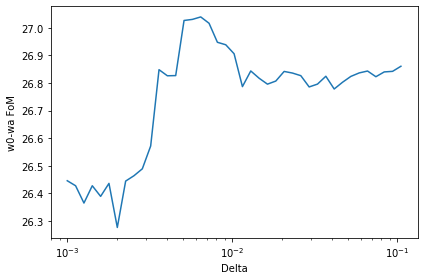

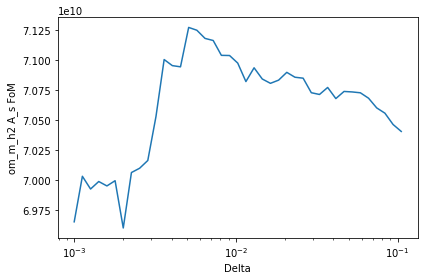

In [33]:
plt.semilogx(deltas[:-9], fom_w0_wa[:-9])
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas[:-9], fom_om_m_h2_A_s[:-9])
plt.xlabel("Delta")
plt.ylabel("om_m_h2 A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.02 for $w_a$

In [34]:
F.derivs[tune_para], _ = F.calc_para_deriv(tune_para, F.deriv_order, 0.02)
F.binned_derivs[tune_para] = F.get_binned_c_ells(F.derivs[tune_para])

Changing paramater wa from 0.000000e+00 by -1 * 1.800000e-02
Changing paramater wa from 0.000000e+00 by 1 * 1.800000e-02



### Fisher Matrix / FoMs

In [35]:
F.get_fisher_mat()
pd.DataFrame(F.fisher, index=F.paras, columns=F.paras)

,om_m_h2,w0,h0,A_s,om_b_h2,n_s,wa
om_m_h2,5.471808e+07,-2.845770e+06,-7.430638e+06,1.564597e+15,-3.083459e+07,2.667086e+06,-9.185837e+05
w0,-2.845770e+06,1.496613e+05,3.847683e+05,-8.181234e+13,1.614342e+06,-1.350882e+05,4.839899e+04
h0,-7.430638e+06,3.847683e+05,1.022598e+06,-2.111925e+14,4.111239e+06,-3.611732e+05,1.234830e+05
A_s,1.564597e+15,-8.181234e+13,-2.111925e+14,4.496516e+22,-8.887088e+14,7.541974e+13,-2.649225e+13
om_b_h2,-3.083459e+07,1.614342e+06,4.111239e+06,-8.887088e+14,1.781083e+07,-1.505041e+06,5.250296e+05
n_s,2.667086e+06,-1.350882e+05,-3.611732e+05,7.541974e+13,-1.505041e+06,1.421470e+05,-4.356234e+04
wa,-9.185837e+05,4.839899e+04,1.234830e+05,-2.649225e+13,5.250296e+05,-4.356234e+04,1.569780e+04


Get some Figures of Merit

In [36]:
para_pairs_list = [("om_m_h2", "A_s"), ("w0", "wa")]
F.get_fom(priors=False, para_pairs_list=para_pairs_list)

om_m_h2 A_s 70886543661.04773
w0 wa 26.837774138143136


In [7]:
f =[[5.471808e+07, -2.845770e+06, -7.430638e+06, 1.564597e+15, -3.083459e+07, 2.667086e+06, -9.185837e+05],
[-2.845770e+06, 1.496613e+05, 3.847683e+05, -8.181234e+13, 1.614342e+06, -1.350882e+05, 4.839899e+04],
[-7.430638e+06, 3.847683e+05, 1.022598e+06, -2.111925e+14, 4.111239e+06, -3.611732e+05, 1.234830e+05],
[1.564597e+15, -8.181234e+13, -2.111925e+14, 4.496516e+22, -8.887088e+14, 7.541974e+13, -2.649225e+13],
[-3.083459e+07, 1.614342e+06, 4.111239e+06, -8.887088e+14, 1.781083e+07, -1.505041e+06, 5.250296e+05],
[2.667086e+06, -1.350882e+05, -3.611732e+05, 7.541974e+13, -1.505041e+06, 1.421470e+05, -4.356234e+04],
[-9.185837e+05, 4.839899e+04, 1.234830e+05, -2.649225e+13, 5.250296e+05, -4.356234e+04, 1.569780e+04]]

In [8]:
np.linalg.cond(f)

1.8774893251100051e+22

# Cosmosis

In [129]:
F.fisher = np.loadtxt("out_fisher_cluster_cosmosis_h2/fisher_out.dat")
pd.DataFrame(F.fisher, index=F.paras, columns=F.paras)

,om_m_h2,w0,h0,A_s,om_b_h2,n_s,wa
om_m_h2,5.482853e+07,-2.827389e+06,-7.412477e+06,1.564836e+15,-3.111237e+07,2.673016e+06,-9.162678e+05
w0,-2.827389e+06,1.475256e+05,3.807692e+05,-8.111924e+13,1.613445e+06,-1.342444e+05,4.787738e+04
h0,-7.412477e+06,3.807692e+05,1.016483e+06,-2.102948e+14,4.114539e+06,-3.605866e+05,1.225451e+05
A_s,1.564836e+15,-8.111924e+13,-2.102948e+14,4.487603e+22,-8.959208e+14,7.545234e+13,-2.637719e+13
om_b_h2,-3.111237e+07,1.613445e+06,4.114539e+06,-8.959208e+14,1.831979e+07,-1.511363e+06,5.290125e+05
n_s,2.673016e+06,-1.342444e+05,-3.605866e+05,7.545234e+13,-1.511363e+06,1.425656e+05,-4.340804e+04
wa,-9.162678e+05,4.787738e+04,1.225451e+05,-2.637719e+13,5.290125e+05,-4.340804e+04,1.560357e+04


In [130]:
para_pairs_list = [("om_m_h2", "A_s"), ("w0", "wa")]
F.get_fom(priors=False, para_pairs_list=para_pairs_list)

om_m_h2 A_s 256749673908.4462
w0 wa 23.796975501924326


## Now let's tune some derivatives

#### Parameter $\Omega_m h^2$

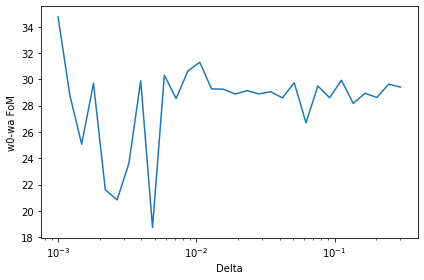

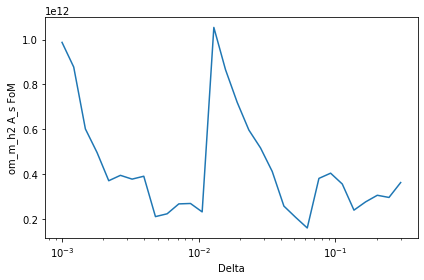

In [54]:
foms = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_ommh2.dat")
# foms = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_ommh2_old.dat")
# foms = np.vstack((foms0, foms))
deltas = foms[:, 0]
fom_om_m_h2_A_s = foms[:, 1]
fom_w0_wa = foms[:, 2]

plt.semilogx(deltas, fom_w0_wa)
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas, fom_om_m_h2_A_s)
plt.xlabel("Delta")
plt.ylabel("om_m_h2 A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.05 for $\Omega_m h^2$

#### Parameter $w_0$

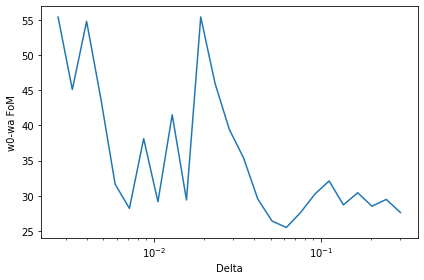

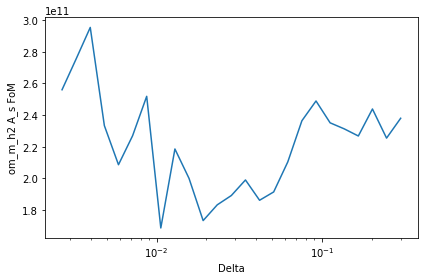

In [73]:
foms = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_w0.dat")
deltas = foms[:, 0]
fom_om_m_h2_A_s = foms[:, 1]
fom_w0_wa = foms[:, 2]

plt.semilogx(deltas[5:], fom_w0_wa[5:])
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas[5:], fom_om_m_h2_A_s[5:])
plt.xlabel("Delta")
plt.ylabel("om_m_h2 A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.05 for $w_0$

#### Parameter $h_0$

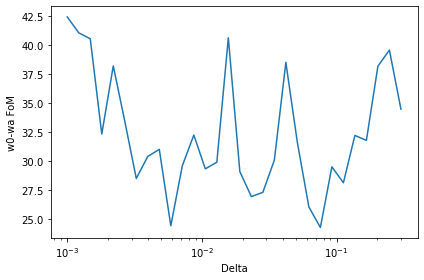

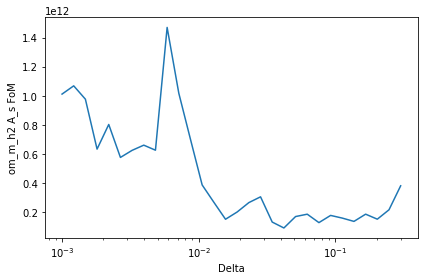

In [84]:
foms = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_h0.dat")
deltas = foms[:, 0]
fom_om_m_h2_A_s = foms[:, 1]
fom_w0_wa = foms[:, 2]

plt.semilogx(deltas[:], fom_w0_wa[:])
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas[:], fom_om_m_h2_A_s[:])
plt.xlabel("Delta")
plt.ylabel("om_m_h2 A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.07 for $h_0$

#### Parameter $A_s$

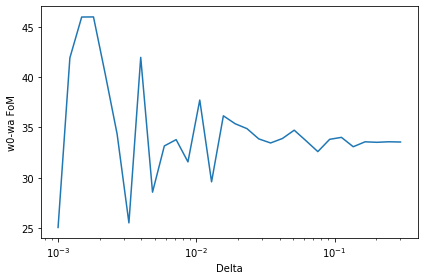

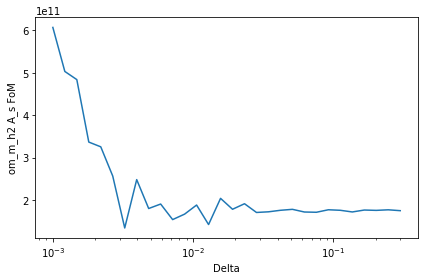

In [95]:
foms = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_A_s.dat")
deltas = foms[:, 0]
fom_om_m_h2_A_s = foms[:, 1]
fom_w0_wa = foms[:, 2]

plt.semilogx(deltas[:], fom_w0_wa[:])
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas[:], fom_om_m_h2_A_s[:])
plt.xlabel("Delta")
plt.ylabel("om_m_h2 A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.1 for $A_s$

#### Parameter $\Omega_b h^2$

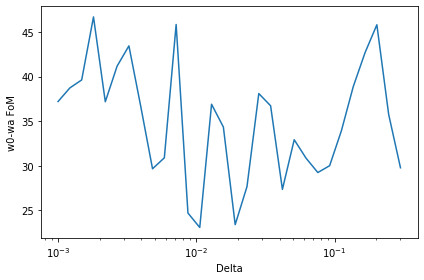

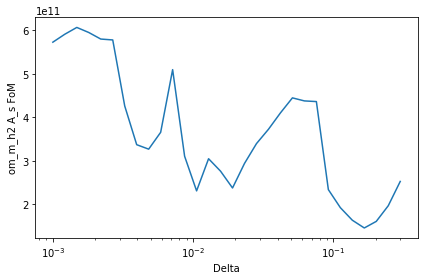

In [107]:
foms = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_ombh2.dat")
deltas = foms[:, 0]
fom_om_m_h2_A_s = foms[:, 1]
fom_w0_wa = foms[:, 2]

plt.semilogx(deltas[:], fom_w0_wa[:])
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas[:], fom_om_m_h2_A_s[:])
plt.xlabel("Delta")
plt.ylabel("om_m_h2 A_s FoM")
plt.tight_layout()
plt.show()

Lower order derivative

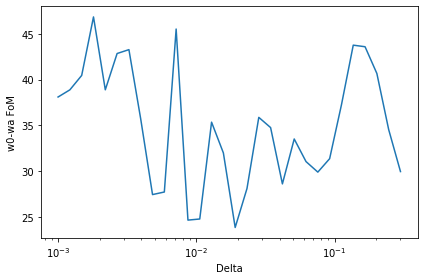

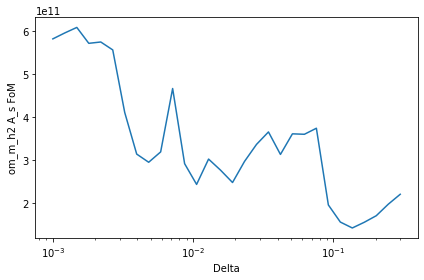

In [110]:
foms = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_ombh2.dat")
deltas = foms[:, 0]
fom_om_m_h2_A_s = foms[:, 1]
fom_w0_wa = foms[:, 2]

plt.semilogx(deltas[:], fom_w0_wa[:])
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas[:], fom_om_m_h2_A_s[:])
plt.xlabel("Delta")
plt.ylabel("om_m_h2 A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.08 for $\Omega_b h^2$

#### Parameter $n_s$

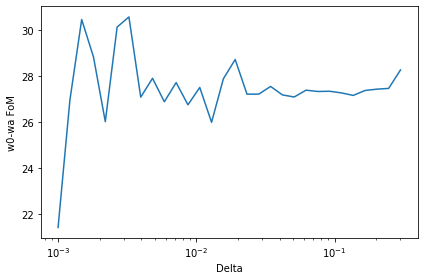

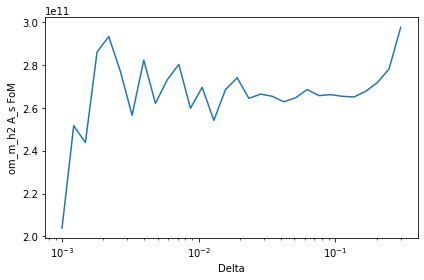

In [6]:
foms = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_n_s.dat")
deltas = foms[:, 0]
fom_om_m_h2_A_s = foms[:, 1]
fom_w0_wa = foms[:, 2]

plt.semilogx(deltas[:], fom_w0_wa[:])
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas[:], fom_om_m_h2_A_s[:])
plt.xlabel("Delta")
plt.ylabel("om_m_h2 A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.1 for $n_s$

#### Parameter $w_a$

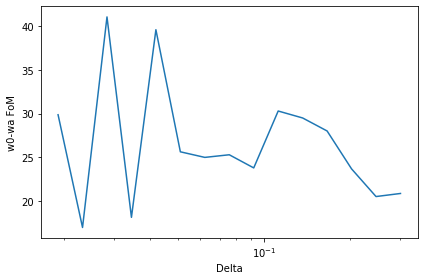

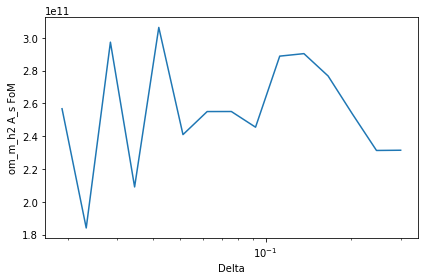

In [13]:
foms = np.loadtxt("out_FOM_vs_delta/FoM_vs_delta_wa.dat")
deltas = foms[:, 0]
fom_om_m_h2_A_s = foms[:, 1]
fom_w0_wa = foms[:, 2]

plt.semilogx(deltas[15:], fom_w0_wa[15:])
plt.xlabel("Delta")
plt.ylabel("w0-wa FoM")
plt.tight_layout()
plt.show()
plt.semilogx(deltas[15:], fom_om_m_h2_A_s[15:])
plt.xlabel("Delta")
plt.ylabel("om_m_h2 A_s FoM")
plt.tight_layout()
plt.show()

Pick 0.09 for $w_a$

In [8]:
1796/8

224.5

In [11]:
-2494/8

-311.75

## After tuning 

In [5]:
F.fisher = np.loadtxt("out_fisher_cluster_cosmosis_h2/fisher_out.dat")
pd.DataFrame(F.fisher, index=F.paras, columns=F.paras)

,om_m_h2,w0,h0,A_s,om_b_h2,n_s,wa
om_m_h2,5.482853e+07,-2.827389e+06,-7.412477e+06,1.564836e+15,-3.111237e+07,2.673016e+06,-9.162678e+05
w0,-2.827389e+06,1.475256e+05,3.807692e+05,-8.111924e+13,1.613445e+06,-1.342444e+05,4.787738e+04
h0,-7.412477e+06,3.807692e+05,1.016483e+06,-2.102948e+14,4.114539e+06,-3.605866e+05,1.225451e+05
A_s,1.564836e+15,-8.111924e+13,-2.102948e+14,4.487603e+22,-8.959208e+14,7.545234e+13,-2.637719e+13
om_b_h2,-3.111237e+07,1.613445e+06,4.114539e+06,-8.959208e+14,1.831979e+07,-1.511363e+06,5.290125e+05
n_s,2.673016e+06,-1.342444e+05,-3.605866e+05,7.545234e+13,-1.511363e+06,1.425656e+05,-4.340804e+04
wa,-9.162678e+05,4.787738e+04,1.225451e+05,-2.637719e+13,5.290125e+05,-4.340804e+04,1.560357e+04


In [15]:
para_pairs_list = [("om_m_h2", "A_s"), ("w0", "wa")]
F.get_fom(priors=False, para_pairs_list=para_pairs_list)

om_m_h2 A_s 256749673908.4462
w0 wa 23.796975501924326


In [6]:
np.linalg.cond(F.fisher)

2.2647160114182745e+22

## Stability Analysis

In [179]:
import copy

In [132]:
ccl_f = F.fisher
cosmosis_f = np.loadtxt("out_fisher_cluster_cosmosis_h2/fisher_out.dat")

In [180]:
paras_sc = copy.deepcopy(F.paras)
paras_sc[3] = "10^9 A_s"

In [176]:
pd.DataFrame(abs(ccl_f-cosmosis_f)/abs(ccl_f), columns=F.paras, index=F.paras)\
.style.background_gradient(cmap="Reds", axis=None)\
.set_caption("Unscaled Fisher Relative Differences")

,om_m_h2,w0,h0,A_s,om_b_h2,n_s,wa
om_m_h2,0.00201851,0.00645902,0.00244409,0.000152548,0.00900872,0.0022232,0.00252107
w0,0.00645902,0.0142703,0.0103934,0.00847184,0.000555726,0.00624656,0.0107774
h0,0.00244409,0.0103934,0.00597996,0.00425086,0.000802768,0.00162409,0.00759597
A_s,0.000152548,0.00847184,0.00425086,0.00198217,0.00811515,0.000432256,0.00434304
om_b_h2,0.00900872,0.000555726,0.000802768,0.00811515,0.0285763,0.00420044,0.00758611
n_s,0.0022232,0.00624656,0.00162409,0.000432256,0.00420044,0.00294479,0.0035419
wa,0.00252107,0.0107774,0.00759597,0.00434304,0.00758611,0.0035419,0.00600264


In [181]:
pd.DataFrame(abs(ccl_f_scaled-cosmosis_f_scaled)/abs(ccl_f_scaled), columns=paras_sc, index=paras_sc)\
.style.background_gradient(cmap="Reds", axis=None)\
.set_caption("Scaled Fisher Relative Differences")

,om_m_h2,w0,h0,10^9 A_s,om_b_h2,n_s,wa
om_m_h2,0.00201851,0.00645902,0.00244409,0.000152548,0.00900872,0.0022232,0.00252107
w0,0.00645902,0.0142703,0.0103934,0.00847184,0.000555726,0.00624656,0.0107774
h0,0.00244409,0.0103934,0.00597996,0.00425086,0.000802768,0.00162409,0.00759597
10^9 A_s,0.000152548,0.00847184,0.00425086,0.00198217,0.00811515,0.000432256,0.00434304
om_b_h2,0.00900872,0.000555726,0.000802768,0.00811515,0.0285763,0.00420044,0.00758611
n_s,0.0022232,0.00624656,0.00162409,0.000432256,0.00420044,0.00294479,0.0035419
wa,0.00252107,0.0107774,0.00759597,0.00434304,0.00758611,0.0035419,0.00600264


### Eigenvalue Comparison

Without scaling A_s

In [133]:
ccl_w, ccl_v = np.linalg.eig(ccl_f)
cosmosis_w, cosmosis_v = np.linalg.eig(cosmosis_f)
ccl_wh, ccl_vh = np.linalg.eigh(ccl_f)
cosmosis_wh, cosmosis_vh = np.linalg.eigh(cosmosis_f)
# note all eignevectors here are unit vectors

In [135]:
eigenvalues_df = pd.DataFrame(np.vstack((ccl_w, cosmosis_w)).T, columns=["ccl", "cosmosis"])
eigenvalues_df["relative difference"] = \
    ((eigenvalues_df.ccl - eigenvalues_df.cosmosis)/(eigenvalues_df.ccl)).fillna(0)
eigenvalues_df["dot product of resp. eigenvecs"] = [np.dot(ccl_v[:, i], cosmosis_v[:, i]) for i in range(len(ccl_v))]
eigenvalues_df.style.set_caption("Eigenvalues from `np.eig`")

,ccl,cosmosis,relative difference,dot product of resp. eigenvecs
0,8.38861e+06,8.38861e+06,0,1
1,4.49652e+22,4.4876e+22,0.00198217,1
2,263671,450222,-0.707511,0.997061
3,24988,23062.6,0.0770545,0.999535
4,4320.24,7225.96,-0.672584,0.981099
5,269.244,513.539,-0.907333,0.983421
6,2.42204,2.44874,-0.0110229,0.999767


In [117]:
eigenvalues_df = pd.DataFrame(np.vstack((sorted(ccl_w), ccl_wh)).T, columns=["eig", "eigh"])
eigenvalues_df["relative difference"] = \
    ((eigenvalues_df.eig - eigenvalues_df.eigh)/(eigenvalues_df.eig)).fillna(0)
eigenvalues_df["dot product of resp. eigenvecs"] = [np.dot(ccl_v[:, i], ccl_vh[:, i]) for i in range(len(ccl_v))]
eigenvalues_df.style.set_caption("Eigenvalues from ccl")

,eig,eigh,relative difference,dot product of resp. eigenvecs
0,2.42204,-487.123,202.121,-1.29478e-05
1,269.244,25.1678,0.906524,5.33204e-18
2,4320.24,4245.43,0.0173165,-0.000236623
3,24988,24661.7,0.0130569,-0.999986
4,263671,263008,0.00251588,0.000225526
5,8.38861e+06,1.67768e+07,-0.999951,6.72596e-06
6,4.49652e+22,4.49652e+22,1.86558e-16,8.13496e-19


In [134]:
eigenvalues_df = pd.DataFrame(np.vstack((sorted(cosmosis_w), cosmosis_wh)).T, columns=["eig", "eigh"])
eigenvalues_df["relative difference"] = \
    ((eigenvalues_df.eig - eigenvalues_df.eigh)/(eigenvalues_df.eig)).fillna(0)
eigenvalues_df["dot product of resp. eigenvecs"] = [np.dot(cosmosis_v[:, i], cosmosis_vh[:, i]) for i in range(len(cosmosis_v))]
eigenvalues_df.style.set_caption("Eigenvalues from cosmosis")

,eig,eigh,relative difference,dot product of resp. eigenvecs
0,2.44874,-403.22,165.664,-6.23447e-05
1,513.539,51.0849,0.900524,-6.71269e-17
2,7225.96,7201.84,0.00333869,-0.000218916
3,23062.6,22784.2,0.0120716,-0.999984
4,450222,449000,0.00271431,0.000200174
5,8.38861e+06,1.67775e+07,-1.00003,-6.95516e-05
6,4.4876e+22,4.4876e+22,3.73857e-16,6.56228e-17


In [136]:
eigenvalues_df = pd.DataFrame(np.vstack((ccl_wh, cosmosis_wh)).T, columns=["ccl", "cosmosis"])
eigenvalues_df["relative difference"] = \
    ((eigenvalues_df.ccl - eigenvalues_df.cosmosis)/(eigenvalues_df.ccl)).fillna(0)
eigenvalues_df["dot product of resp. eigenvecs"] = [np.dot(ccl_vh[:, i], cosmosis_vh[:, i]) for i in range(len(ccl_vh))]
eigenvalues_df.style.set_caption("Eigenvalues from `np.eigh`")

,ccl,cosmosis,relative difference,dot product of resp. eigenvecs
0,-487.123,-403.22,0.172243,0.984558
1,25.1678,51.0849,-1.02977,0.991939
2,4245.43,7201.84,-0.696375,0.986493
3,24661.7,22784.2,0.076133,0.999556
4,263008,449000,-0.707172,0.99708
5,1.67768e+07,1.67775e+07,-3.90367e-05,0.999997
6,4.49652e+22,4.4876e+22,0.00198217,1


After scaling A_s

In [137]:
A_s_scaler = np.identity(len(ccl_f))
A_s_scaler[3,3] = 1e-9
ccl_f_scaled = np.dot(A_s_scaler,np.dot(ccl_f, A_s_scaler))
cosmosis_f_scaled = np.dot(A_s_scaler,np.dot(cosmosis_f, A_s_scaler))

In [142]:
ccl_w, ccl_v = np.linalg.eig(ccl_f_scaled)
ccl_wh, ccl_vh = np.linalg.eigh(ccl_f_scaled)
cosmosis_w, cosmosis_v = np.linalg.eig(cosmosis_f_scaled)
cosmosis_wh, cosmosis_vh = np.linalg.eigh(cosmosis_f_scaled)
# note all eignevectors here are unit vectors

In [143]:
eigenvalues_df = pd.DataFrame(np.vstack((ccl_w, cosmosis_w)).T, columns=["ccl", "cosmosis"])
eigenvalues_df["relative difference"] = \
    ((eigenvalues_df.ccl - eigenvalues_df.cosmosis)/(eigenvalues_df.ccl)).fillna(0)
eigenvalues_df["dot product of resp. eigenvecs"] = [np.dot(ccl_v[:, i], cosmosis_v[:, i]) for i in range(len(ccl_v))]
eigenvalues_df.style.set_caption("Eigenvalues from `np.eig`")

,ccl,cosmosis,relative difference,dot product of resp. eigenvecs
0,7.35368e+07,7.39718e+07,-0.00591459,-0.99999
1,353143,527874,-0.494789,-0.999017
2,13497.5,13605.1,-0.00797472,0.997806
3,226.261,1884.02,-7.32676,0.605672
4,278.39,221.194,0.205454,-0.642456
5,3.79543,25.9557,-5.83869,-0.958028
6,2.20769,1.75863,0.203408,0.996997


In [144]:
eigenvalues_df = pd.DataFrame(np.vstack((sorted(ccl_w), ccl_wh)).T, columns=["eig", "eigh"])
eigenvalues_df["relative difference"] = \
    ((eigenvalues_df.eig - eigenvalues_df.eigh)/(eigenvalues_df.eig)).fillna(0)
eigenvalues_df["dot product of resp. eigenvecs"] = [np.dot(ccl_v[:, i], ccl_vh[:, i]) for i in range(len(ccl_v))]
eigenvalues_df.style.set_caption("Eigenvalues from ccl")

,eig,eigh,relative difference,dot product of resp. eigenvecs
0,2.20769,2.20769,4.55856e-11,3.46945e-17
1,3.79543,3.79543,1.18334e-11,2.77556e-16
2,226.261,226.261,7.68435e-12,4.56024e-14
3,278.39,278.39,2.90148e-12,-2.56586e-11
4,13497.5,13497.5,-5.92967e-15,-7.27196e-15
5,353143,353143,-6.92275e-15,4.67508e-16
6,7.35368e+07,7.35368e+07,8.10541e-16,-1.04083e-17


In [145]:
eigenvalues_df = pd.DataFrame(np.vstack((sorted(cosmosis_w), cosmosis_wh)).T, columns=["eig", "eigh"])
eigenvalues_df["relative difference"] = \
    ((eigenvalues_df.eig - eigenvalues_df.eigh)/(eigenvalues_df.eig)).fillna(0)
eigenvalues_df["dot product of resp. eigenvecs"] = [np.dot(cosmosis_v[:, i], cosmosis_vh[:, i]) for i in range(len(cosmosis_v))]
eigenvalues_df.style.set_caption("Eigenvalues from cosmosis")

,eig,eigh,relative difference,dot product of resp. eigenvecs
0,1.75863,1.75863,1.09281e-10,-6.93889e-18
1,25.9557,25.9557,9.49863e-12,3.43849e-15
2,221.194,221.194,2.08745e-11,-5.67046e-14
3,1884.02,1884.02,-2.29785e-13,-1
4,13605.1,13605.1,4.41207e-15,-2.26485e-14
5,527874,527874,1.67607e-14,1.97043e-15
6,7.39718e+07,7.39718e+07,-8.05776e-16,0


In [146]:
eigenvalues_df = pd.DataFrame(np.vstack((ccl_wh, cosmosis_wh)).T, columns=["ccl", "cosmosis"])
eigenvalues_df["relative difference"] = \
    ((eigenvalues_df.ccl - eigenvalues_df.cosmosis)/(eigenvalues_df.ccl)).fillna(0)
eigenvalues_df["dot product of resp. eigenvecs"] = [np.dot(ccl_vh[:, i], cosmosis_vh[:, i]) for i in range(len(ccl_vh))]
eigenvalues_df.style.set_caption("Eigenvalues from `np.eigh`")

,ccl,cosmosis,relative difference,dot product of resp. eigenvecs
0,2.20769,1.75863,0.203408,0.996997
1,3.79543,25.9557,-5.83869,0.958028
2,226.261,221.194,0.0223953,-0.76427
3,278.39,1884.02,-5.76756,0.744315
4,13497.5,13605.1,-0.00797472,-0.997806
5,353143,527874,-0.494789,-0.999017
6,7.35368e+07,7.39718e+07,-0.00591459,0.99999


### Inversion Routines

In [155]:
import scipy  as sp
import seaborn as sns

In [156]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

In [126]:
def cholesky_inv(A):
    return sp.linalg.cho_solve(sp.linalg.cho_factor(A), np.eye(len(A)))

In [122]:
def get_bounds(A, inv_func, norm=None):
    X = inv_func(A)
    R = np.eye(len(A)) - np.dot(A, X)
    lower = norm(np.dot(X, R))/(1 + norm(R))
    upper = norm(np.dot(X, R))/(1 - norm(R))
    return lower, upper

In [149]:
cond_ccl = np.linalg.cond(ccl_f)
cond2 = np.linalg.cond(cosmosis_f)
cond_ccl_scaled = np.linalg.cond(ccl_f_scaled)
cond2_scaled = np.linalg.cond(cosmosis_f_scaled)
print("The condition number of CCL's fisher matrix is:", np.linalg.cond(ccl_f))
print("The condition number of Cosmosis' fisher matrix is:", np.linalg.cond(cosmosis_f))
print("The condition number of CCL's scaled fisher matrix is:", np.linalg.cond(ccl_f_scaled))
print("The condition number of Cosmosis' scaled fisher matrix is:", np.linalg.cond(cosmosis_f_scaled))

The condition number of CCL's fisher matrix is: 1.8723248965780958e+22
The condition number of Cosmosis' fisher matrix is: 2.2647160114182745e+22
The condition number of CCL's scaled fisher matrix is: 33309365.41155556
The condition number of Cosmosis' scaled fisher matrix is: 42062145.19385676


##### regular `np.linalg.inv` inverse

In [182]:
ccl_cov_0 = pd.DataFrame(np.linalg.inv(ccl_f), index=F.paras, columns=F.paras)
cosmosis_cov_0 = pd.DataFrame(np.linalg.inv(cosmosis_f), index=F.paras, columns=F.paras)
ccl_scaled_cov_0 = pd.DataFrame(np.linalg.inv(ccl_f_scaled), index=paras_sc, columns=paras_sc)
cosmosis_scaled_cov_0 = pd.DataFrame(np.linalg.inv(cosmosis_f_scaled), index=paras_sc, columns=paras_sc)

In [163]:
(abs(ccl_cov_0-cosmosis_cov_0)/abs(ccl_cov_0))\
.style.background_gradient(cmap="Reds", axis=None).set_caption("Unscaled Covariance Relative Differences")

,om_m_h2,w0,h0,A_s,om_b_h2,n_s,wa
om_m_h2,0.907125,6.4811,0.931585,0.826378,0.935325,0.837455,2.86982
w0,6.4811,0.286834,1.9202,1.10741,8.07455,2.56712,0.26734
h0,0.931585,1.9202,0.945753,0.890595,0.955085,0.868418,1.3715
A_s,0.826378,1.10741,0.890595,0.584191,0.860192,0.806109,0.947695
om_b_h2,0.935325,8.07455,0.955085,0.860192,0.942765,0.916032,6.8257
n_s,0.837455,2.56712,0.868418,0.806109,0.916032,0.634454,0.780772
wa,2.86982,0.26734,1.3715,0.947695,6.8257,0.780772,0.210291


In [183]:
(abs(ccl_scaled_cov_0-cosmosis_scaled_cov_0)/abs(ccl_scaled_cov_0))\
.style.background_gradient(cmap="Reds", axis=None).set_caption("Scaled Covariance Relative Differences")

,om_m_h2,w0,h0,10^9 A_s,om_b_h2,n_s,wa
om_m_h2,0.907125,6.4811,0.931585,0.826378,0.935325,0.837455,2.86982
w0,6.4811,0.286834,1.9202,1.10741,8.07455,2.56712,0.26734
h0,0.931585,1.9202,0.945753,0.890595,0.955085,0.868418,1.3715
10^9 A_s,0.826378,1.10741,0.890595,0.584191,0.860192,0.806109,0.947695
om_b_h2,0.935325,8.07455,0.955085,0.860192,0.942765,0.916032,6.8257
n_s,0.837455,2.56712,0.868418,0.806109,0.916032,0.634454,0.780772
wa,2.86982,0.26734,1.3715,0.947695,6.8257,0.780772,0.210291


In [123]:
lu_l1, lu_u1 = get_bounds(ccl_f, np.linalg.inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(lu_l1,lu_u1, lu_u1-lu_l1))

For the regular numpy inverse,
the lower bound is 2.721282e-12,
the upper bound is 2.736612e-12,
and the spread is 1.533000e-14


In [184]:
lu_l2, lu_u2 = get_bounds(cosmosis_f, np.linalg.inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(lu_l2,lu_u2, lu_u2-lu_l2))

For the regular numpy inverse,
the lower bound is 2.785707e-13,
the upper bound is 2.789364e-13,
and the spread is 3.656435e-16


In [124]:
lu_l1_scaled, lu_u1_scaled = get_bounds(ccl_f_scaled, np.linalg.inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(lu_l1_scaled,lu_u1_scaled, lu_u1_scaled-lu_l1_scaled))

For the regular numpy inverse,
the lower bound is 5.728195e-12,
the upper bound is 5.728195e-12,
and the spread is 1.545883e-21


In [185]:
lu_l2_scaled, lu_u2_scaled = get_bounds(cosmosis_f_scaled, np.linalg.inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(lu_l2_scaled,lu_u2_scaled, lu_u2_scaled-lu_l2_scaled))

For the regular numpy inverse,
the lower bound is 1.684264e-12,
the upper bound is 1.684264e-12,
and the spread is 2.445571e-22


##### `cholesky` inverse

In [167]:
ccl_cov_1 = pd.DataFrame(cholesky_inv(ccl_f), index=F.paras, columns=F.paras)
cosmosis_cov_1 = pd.DataFrame(cholesky_inv(cosmosis_f), index=F.paras, columns=F.paras)
ccl_scaled_cov_1 = pd.DataFrame(cholesky_inv(ccl_f_scaled), index=F.paras, columns=F.paras)
cosmosis_scaled_cov_1 = pd.DataFrame(cholesky_inv(cosmosis_f_scaled), index=F.paras, columns=F.paras)

In [170]:
(abs(ccl_cov_1-cosmosis_cov_1)/abs(ccl_cov_1)).\
style.background_gradient(cmap="Reds", axis=None).\
set_caption("Unscaled Covariance Relative Differences")

,om_m_h2,w0,h0,A_s,om_b_h2,n_s,wa
om_m_h2,0.907125,6.4811,0.931585,0.826378,0.935325,0.837455,2.86982
w0,6.4811,0.286834,1.9202,1.10741,8.07455,2.56712,0.26734
h0,0.931585,1.9202,0.945753,0.890595,0.955085,0.868418,1.3715
A_s,0.826378,1.10741,0.890595,0.584191,0.860192,0.806109,0.947695
om_b_h2,0.935325,8.07455,0.955085,0.860192,0.942765,0.916032,6.8257
n_s,0.837455,2.56712,0.868418,0.806109,0.916032,0.634454,0.780772
wa,2.86982,0.26734,1.3715,0.947695,6.8257,0.780772,0.210291


In [172]:
(abs(ccl_scaled_cov_1-cosmosis_scaled_cov_1)/abs(ccl_scaled_cov_1))\
.style.background_gradient(cmap="Reds", axis=None)\
.set_caption("Scaled Covariance Relative Differences")

,om_m_h2,w0,h0,A_s,om_b_h2,n_s,wa
om_m_h2,0.907125,6.4811,0.931585,0.826378,0.935325,0.837455,2.86982
w0,6.4811,0.286834,1.9202,1.10741,8.07455,2.56712,0.26734
h0,0.931585,1.9202,0.945753,0.890595,0.955085,0.868418,1.3715
A_s,0.826378,1.10741,0.890595,0.584191,0.860192,0.806109,0.947695
om_b_h2,0.935325,8.07455,0.955085,0.860192,0.942765,0.916032,6.8257
n_s,0.837455,2.56712,0.868418,0.806109,0.916032,0.634454,0.780772
wa,2.86982,0.26734,1.3715,0.947695,6.8257,0.780772,0.210291


In [127]:
cho_l1, cho_u1 = get_bounds(ccl_f, cholesky_inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(cho_l1,cho_u1, cho_u1-cho_l1))

For the regular numpy inverse,
the lower bound is 3.831104e-12,
the upper bound is 3.876244e-12,
and the spread is 4.513929e-14


In [186]:
cho_l2, cho_u2 = get_bounds(cosmosis_f, cholesky_inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(cho_l2,cho_u2, cho_u2-cho_l2))

For the regular numpy inverse,
the lower bound is 5.003696e-13,
the upper bound is 5.042560e-13,
and the spread is 3.886391e-15


In [128]:
cho_l1_scaled, cho_u1_scaled = get_bounds(ccl_f_scaled, cholesky_inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(cho_l1_scaled,cho_u1_scaled, cho_u1_scaled-cho_l1_scaled))

For the regular numpy inverse,
the lower bound is 2.024411e-11,
the upper bound is 2.024411e-11,
and the spread is 1.866414e-20


In [187]:
cho_l2_scaled, cho_u2_scaled = get_bounds(cosmosis_f_scaled, cholesky_inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(cho_l2_scaled,cho_u2_scaled, cho_u2_scaled-cho_l2_scaled))

For the regular numpy inverse,
the lower bound is 4.437290e-13,
the upper bound is 4.437290e-13,
and the spread is 1.784704e-22


## Figures of Merit Comparisons

In [208]:
from scipy.stats import norm, chi2
from matplotlib.patches import Ellipse

In [196]:
# some functions to calculate the figure of merit for any pair of parameters
def marg_cov(cov, para1, para2, paras):
    ind1 = paras.index(para1)
    ind2 = paras.index(para2)
    inds = np.asarray((ind1, ind2))
    # first get all indeces to remove
    all_cov_inds = range(len(cov[0]))
    del_inds = np.delete(all_cov_inds, inds)
    # then delete rows and cols
    marged_cov = np.delete(np.delete(cov, del_inds, 0), del_inds, 1)
    return marged_cov

def calc_fom(cov):
    # takes marg cov matrix
    # inverts it to get reduced fisher matrix
    # returns sqrt of det of fisher matrix
    fisher = np.linalg.inv(cov)
    FOM = np.sqrt(np.linalg.det(fisher))
    return FOM

def fom(fisher, para1, para2, paras, inv=np.linalg.inv):
    cov = inv(fisher)
    marged_cov = marg_cov(cov, para1, para2, paras)
    return calc_fom(marged_cov)

In [207]:
# plotting helper function
def plot_cov_ellipse(cov, pos, nstd=1, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the
    ellipse patch artist.
    Parameters
    ----------
    cov :  The 2x2 covariance matrix to base the ellipse on
    pos :  The location of the center of the ellipse. Expects a 2-element
           sequence of [x0, y0].
    nstd : The radius of the ellipse in numbers of standard deviations.
           Defaults to 2 standard deviations.
    ax :   The axis that the ellipse will be plotted on. Defaults to the
           current axis.
    Additional keyword arguments are pass on to the ellipse patch.

    Returns:
    -------
    A matplotlib ellipse artist
    """

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    #print vals, vecs

    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Calculate chi squared correction for ellipse
    # Uses chi2 pdf with 2 degrees of freedom
    # note ppf is the quantile function
    def chi2correction(nstd):

        def get_conf_level(ntsd):
            # if X ~ N(u, s) gaussian,
            # then this function returns
            # Pr(u - ntsd*s < X < u + ntsd*s)
            # 
            # nstd 1 -> .6827
            # ntsd 2 -> .9545
            # ntsd 3 -> .9973
            return 1 - (1 - norm().cdf(ntsd))*2
        
        conf_level = get_conf_level(nstd)
        return np.sqrt(chi2(2).ppf(conf_level))

    # Width and height are "full" widths, not radius
    width, height = 2 * chi2correction(nstd) * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)
    ellip.set_facecolor('none')
    plt.gca().add_patch(ellip)
    return ellip

In [199]:
w_fom1 = fom(ccl_f, "w0", "wa", F.paras)
w_fom2 = fom(cosmosis_f, "w0", "wa", F.paras)

In [202]:
w_fom1_scaled = fom(ccl_f_scaled, "w0", "wa", paras_sc)
w_fom2_scaled = fom(cosmosis_f_scaled, "w0", "wa", paras_sc)

In [214]:
print(w_fom1)
print(w_fom1_scaled)
print(w_fom2)
print(w_fom2_scaled)

26.837774138133444
26.837774138133767
23.796975501924326
23.796975501874886


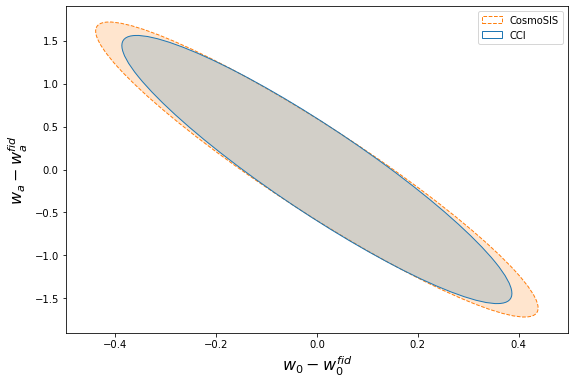

In [210]:
plt.subplots(figsize=(9,6))

mc1 = marg_cov(np.linalg.inv(ccl_f_scaled), "w0", "wa", paras_sc)
mc2 = marg_cov(np.linalg.inv(cosmosis_f_scaled), "w0", "wa", paras_sc)

el2 = plot_cov_ellipse(mc2, (0,0), nstd=2)
el2.set_facecolor("C1")
el2.set_alpha(0.2)
el2 = plot_cov_ellipse(mc2, (0,0), nstd=2, label="CosmoSIS", linestyle="--")
el2.set_edgecolor("C1")

el1 = plot_cov_ellipse(mc1, (0,0), nstd=2)
el1.set_facecolor("C0")
el1.set_alpha(0.2)
el1 = plot_cov_ellipse(mc1, (0,0), nstd=2, label="CCl")
el1.set_edgecolor("C0")

plt.autoscale()
plt.legend()
plt.xlabel(r'$w_0 - w_0^{fid}$', fontsize=16)
plt.ylabel(r'$w_a - w_a^{fid}$', fontsize=16)
plt.show()

In [205]:
om_fom1 = fom(ccl_f, "om_m_h2", "A_s", F.paras)
om_fom2 = fom(cosmosis_f, "om_m_h2", "A_s", F.paras)

In [206]:
om_fom1_scaled = fom(ccl_f_scaled, "om_m_h2", "10^9 A_s", paras_sc)
om_fom2_scaled = fom(cosmosis_f_scaled, "om_m_h2", "10^9 A_s", paras_sc)

In [215]:
print(om_fom1)
print(om_fom1_scaled)
print(om_fom2)
print(om_fom2_scaled)

70886543664.73163
70.88654366381405
256749673908.4462
256.7496739077746


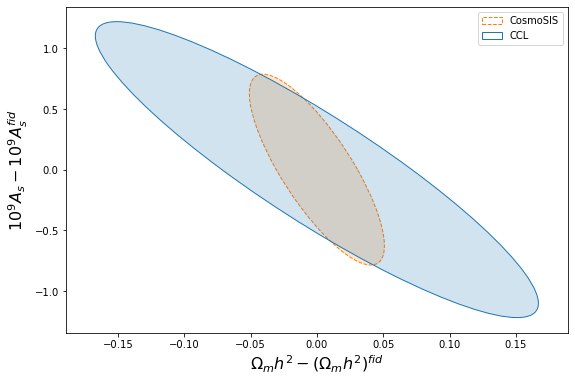

In [213]:
plt.subplots(figsize=(9,6))

mc1 = marg_cov(np.linalg.inv(ccl_f_scaled), "om_m_h2", "10^9 A_s", paras_sc)
mc2 = marg_cov(np.linalg.inv(cosmosis_f_scaled), "om_m_h2", "10^9 A_s", paras_sc)

el2 = plot_cov_ellipse(mc2, (0,0), nstd=2)
el2.set_facecolor("C1")
el2.set_alpha(0.2)
el2 = plot_cov_ellipse(mc2, (0,0), nstd=2, label="CosmoSIS", linestyle="--")
el2.set_edgecolor("C1")

el1 = plot_cov_ellipse(mc1, (0,0), nstd=2)
el1.set_facecolor("C0")
el1.set_alpha(0.2)
el1 = plot_cov_ellipse(mc1, (0,0), nstd=2, label="CCL")
el1.set_edgecolor("C0")

plt.autoscale()
plt.legend()
plt.xlabel(r'$\Omega_mh^2 - (\Omega_mh^{2})^{fid}$', fontsize=16)
plt.ylabel(r'$10^9A_s - 10^9A_s^{fid}$', fontsize=16)
plt.show()